In [1]:
import geopandas as gpd
import pandas as pd
import os

In [2]:
files = []
for i in os.listdir():
    if ('.csv' in i) and ('year' not in i) and (i != 'NYC_ZIPCODES.csv') and (i != 'Features_Zipcode_Final.csv'):
        files.append(i)
files

['Bike Infrastructure Density.csv',
 'citibike_merge.csv',
 'Accidents_Normalized_Zipcodes.csv',
 'Population.csv',
 'Accident_Zipcodes.csv',
 'NYC_Income.csv']

In [3]:
NYC_Zips = pd.read_csv('NYC_ZIPCODES.csv')
NYC_Zips['ZIPCODE'] = NYC_Zips['ZIPCODE'].astype(int).astype(str)
NYC_Zips = NYC_Zips.drop_duplicates('ZIPCODE').set_index('ZIPCODE').drop(['Unnamed: 0','geometry'],axis=1)
NYC_Zips.shape

(248, 0)

In [4]:
data = []
for i in files:
    temp = pd.read_csv(i).drop(['geometry','Unnamed: 0'],axis=1,errors='ignore')
    temp.columns = map(str.upper, temp.columns)
    temp['ZIPCODE'] = temp['ZIPCODE'].astype(int).astype(str)
    temp = temp.groupby(['ZIPCODE']).sum()
    data.append(temp)
    print(temp.shape)
    print(temp.columns)
    print(len(temp.index.unique()))

(178, 3)
Index(['TOTAL STREET LENGTH', 'TOTAL BIKE LANE LENGTH', 'BIKE LANE DENSITY'], dtype='object')
178
(54, 1)
Index(['NUM_DOCKS_AVAILABLE'], dtype='object')
54
(248, 2)
Index(['TRIPS', 'NORMALIZED ACCIDENT COUNT'], dtype='object')
248
(1794, 2)
Index(['WHITE_POP %', 'POPULATION'], dtype='object')
1794
(248, 1)
Index(['ACCIDENT COUNT'], dtype='object')
248
(183, 1)
Index(['MEAN INCOME'], dtype='object')
183


In [5]:
data[5]

,MEAN INCOME
ZIPCODE,
10001,91461.0
10002,34078.0
10003,100740.0
10004,729852.0
10005,120941.0
...,...
11691,25924.0
11692,25820.0
11693,126500.0


In [6]:
temp = data[0]
for i in range(1,len(data)):
    temp = temp.merge(data[i],left_index=True, right_index=True,how='outer')
temp = NYC_Zips.merge(temp,left_index=True, right_index=True,how='left')

In [7]:
temp.shape

(248, 10)

In [8]:
temp

,TOTAL STREET LENGTH,TOTAL BIKE LANE LENGTH,BIKE LANE DENSITY,NUM_DOCKS_AVAILABLE,TRIPS,NORMALIZED ACCIDENT COUNT,WHITE_POP %,POPULATION,ACCIDENT COUNT,MEAN INCOME
ZIPCODE,,,,,,,,,,
11436,NaN,NaN,NaN,NaN,8192.653036,0.378388,7.031032,17949.0,31.0,29271.0
11213,146367.805288,28632.146155,0.195618,NaN,780.000000,45.128205,28.880142,63767.0,352.0,29216.0
11212,215912.786687,40575.901547,0.187927,NaN,87326.231788,0.381329,11.172781,84500.0,333.0,20958.0
11225,114141.251961,26079.822125,0.228487,149.0,6879.000000,4.564617,31.436415,56829.0,314.0,38992.0
11218,208355.389994,24186.845000,0.116085,23.0,1186.000000,28.667791,62.269343,75220.0,340.0,36189.0
...,...,...,...,...,...,...,...,...,...,...
11414,272253.403006,36220.978655,0.133041,NaN,7158.617832,0.544798,86.626128,26148.0,39.0,43104.0
10310,235928.092074,19882.872299,0.084275,NaN,8787.039564,0.546259,59.562535,24962.0,48.0,37030.0
11249,98504.313147,36952.712403,0.375138,1.0,46514.000000,0.470826,NaN,NaN,219.0,NaN


In [9]:
temp.to_csv('Features_Zipcode_Final.csv')

In [10]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 11436 to 10119
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TOTAL STREET LENGTH        178 non-null    float64
 1   TOTAL BIKE LANE LENGTH     178 non-null    float64
 2   BIKE LANE DENSITY          178 non-null    float64
 3   NUM_DOCKS_AVAILABLE        54 non-null     float64
 4   TRIPS                      248 non-null    float64
 5   NORMALIZED ACCIDENT COUNT  248 non-null    float64
 6   WHITE_POP %                209 non-null    float64
 7   POPULATION                 209 non-null    float64
 8   ACCIDENT COUNT             248 non-null    float64
 9   MEAN INCOME                183 non-null    float64
dtypes: float64(10)
memory usage: 29.4+ KB


In [11]:
temp.describe()

,TOTAL STREET LENGTH,TOTAL BIKE LANE LENGTH,BIKE LANE DENSITY,NUM_DOCKS_AVAILABLE,TRIPS,NORMALIZED ACCIDENT COUNT,WHITE_POP %,POPULATION,ACCIDENT COUNT,MEAN INCOME
count,1.780000e+02,178.000000,178.000000,54.000000,248.000000,248.000000,209.000000,209.000000,248.000000,183.000000
mean,2.066909e+05,26404.814333,0.176869,96.185185,24344.496090,4.006793,inf,39447.631579,134.625000,55186.928962
std,1.633707e+05,20033.100699,0.132892,94.857803,35257.201195,20.571348,NaN,28906.147613,154.388648,64423.086148
min,1.576290e+03,53.408440,0.000243,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9341.000000
25%,1.002740e+05,12006.429826,0.073142,24.750000,664.151566,0.318996,19.372172,17590.000000,2.750000,28466.500000
50%,1.832718e+05,23180.104807,0.156311,69.000000,8297.826518,0.392346,45.815429,36934.000000,75.000000,35412.000000
75%,2.732089e+05,36584.785026,0.252600,117.000000,35574.000000,0.500083,71.045284,59707.000000,232.000000,55583.000000
max,1.361788e+06,95198.087867,0.574144,404.000000,198946.000000,260.621762,inf,109931.000000,714.000000,729852.000000


<AxesSubplot:>

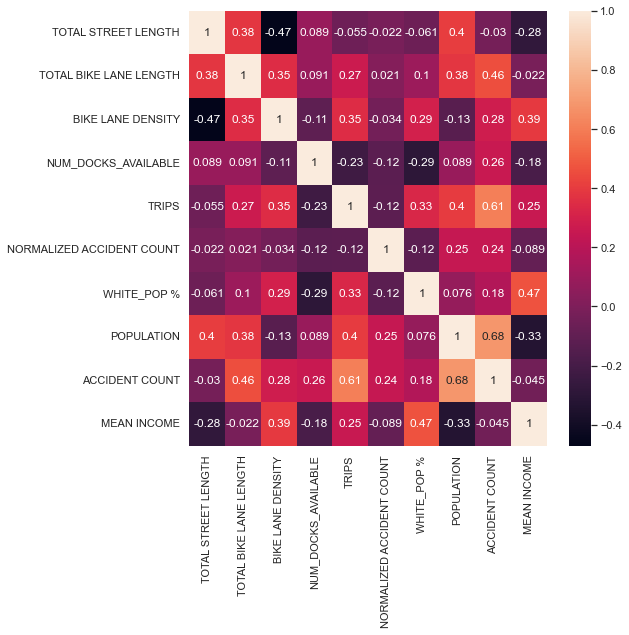

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(temp.corr(),annot=True)